In [2]:
# import libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# SE INGRESA EL CODIGO DE LA ACCION
ticker = "MSFT" # EL CODIGO SE PUEDE CONSULTAR EN
msft = yf.Ticker("MSFT")

In [2]:
## OBTIENE TODA LA INFORMACION DE UNA ACCION A PARTIR DE SU SIMBOLO
## COLOCAR UNA MARCA CON LA FECHA DEL DIA ACTUAL, COLOCAR FORMATO Y OTRAS COSAS
ticker = "MSFT"

print("INFORMACION FINANCIERA DE : " + ticker + " AL DIA DE :")
print("\n")

def ObtenerInformacion(ticker):
    ticker = yf.Ticker(ticker)
    for keys, values in ticker.info.items():
        # Imprime en el formato necesario la informacion de los principales ejecutivos
        if str(keys) == 'companyOfficers':
            print('companyOfficers:')
            for exec in range(0,len(ticker.info["companyOfficers"])): #** OJO: AQUI VIENE UNA LISTA CON LOS EJECUTIVOS PRINCIPALES ***/
                for keys1,values1 in ticker.info["companyOfficers"][exec].items():
                    print("         "+str(keys1) + ": " + str(values1))
                print("\n")    
        # imprime el diccionario normalmente
        else:
            print(str(keys) + ": " + str(values))
#for keys1,values1 in ticker.info["companyOfficers"][exec]:

ObtenerInformacion(ticker=ticker)

INFORMACION FINANCIERA DE : MSFT AL DIA DE :


address1: One Microsoft Way
city: Redmond
state: WA
zip: 98052-6399
country: United States
phone: 425 882 8080
website: https://www.microsoft.com
industry: Software - Infrastructure
industryKey: software-infrastructure
industryDisp: Software - Infrastructure
sector: Technology
sectorKey: technology
sectorDisp: Technology
longBusinessSummary: Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-pr

TypeError: float() argument must be a string or a real number, not 'Axes'

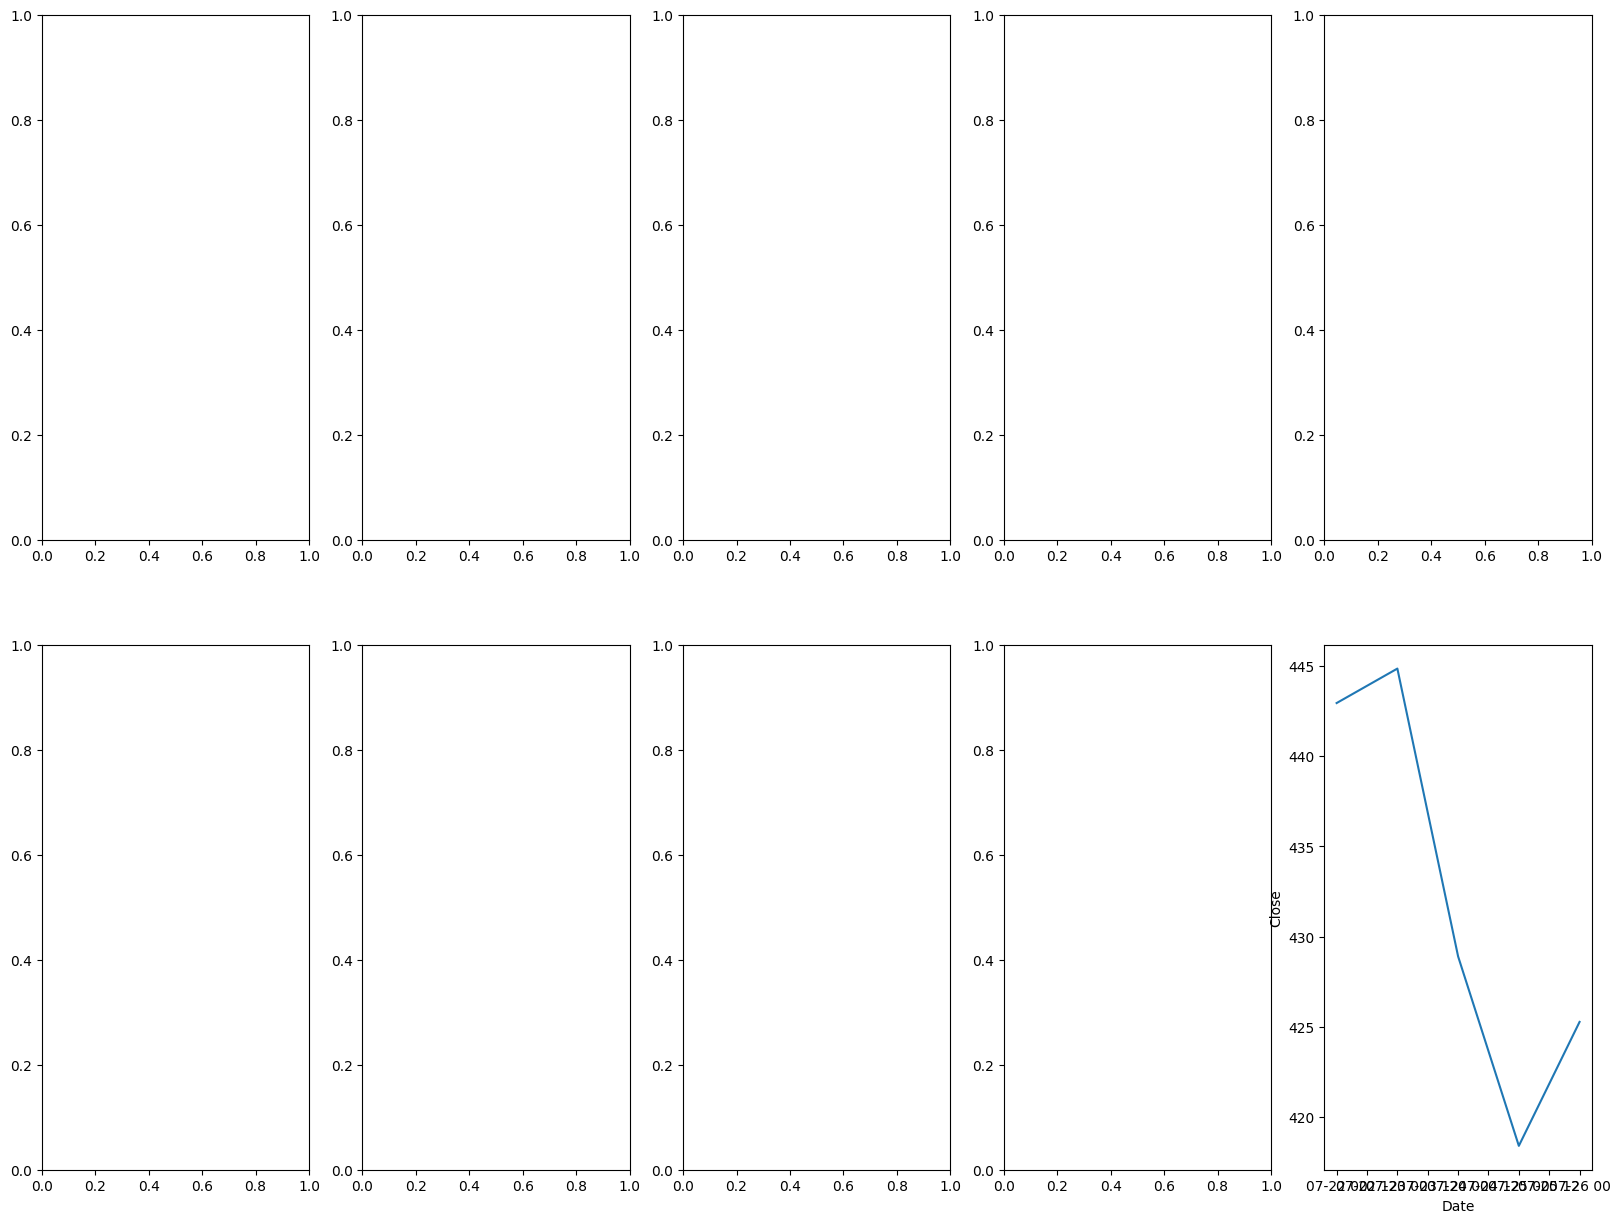

In [32]:
# SE OBTIENE LA INFORMACION DE LOS ULTIMOS 

ticker = "MSFT"

def ObtenerPeriodo(ticker, number): ##PARA TENER EN CONSIDERACION ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    ticker_ob = yf.Ticker(ticker)
    ## FALTA 
    per = str(number)
    # Revisar que otras opciones tengo
    hist = ticker_ob.history(period=str(per))
    # Se puede hacer un grafico para ver como se ha comportado
    df_hist = pd.DataFrame(data=hist)
    return df_hist
    # print(df_hist)
    # Genera visualizacion
    #return sns.lineplot(df_hist, x=df_hist.index, y=df_hist['Close'])
    # Format
    #plt.suptitle("Valor de " + ticker + " en dólares (Cierre sesión). Periodo: " + per)
    #plt.ylabel("Valor de " + ticker + " en dólares (Cierre sesión).")
    #plt.xlabel("Fecha(AAAAMM)")
    # Show
    #plt.show()

## Crear una vista con matplotlib de diferentes graficos que contengan la informacion de los 5d al max:
# Ordenar las siguientes imagenes 5 x 5
# Optimizar el como se muestran las fechas de las en el eje X de las visualizaciones.

#SE GENERA UNA VISUALIZACION DE 5 X 5 CUADROS, PARA VISUALIZAR LA EVOLUCION DE LA STOCK
fig,axes=plt.subplots(nrows=2,ncols=5,figsize=(20,15))

# axes[0,0].plot(ObtenerPeriodo(ticker,'5d'))
# axes[0,0].set_title('5d')
# axes[1,1].plot(ObtenerPeriodo(ticker,'1mo'))
# axes[1,1].set_title('1mo')
# axes[1,2].plot(ObtenerPeriodo(ticker,'3mo'))
# axes[1,2].set_title('3mo')
# axes[1,4].plot(ObtenerPeriodo(ticker,'6mo'))
# axes[1,4].set_title('6mo')
# axes[1,5].plot(ObtenerPeriodo(ticker,'1y'))
# axes[1,5].set_title('1y')
# axes[2,0].plot(ObtenerPeriodo(ticker,'2y'))
# axes[2,0].set_title('2y')
# axes[2,1].plot(ObtenerPeriodo(ticker,'5y'))
# axes[2,1].set_title('5y')
# axes[2,2].plot(ObtenerPeriodo(ticker,'10y'))
# axes[2,2].set_title('10y')
# axes[2,3].plot(ObtenerPeriodo(ticker,'ytd'))
# axes[2,3].set_title('ytd')
# axes[2,4].plot(ObtenerPeriodo(ticker,'max'))
# axes[2,4].set_title('max available')

sns.lineplot(df_hist, x=df_hist.index, y=df_hist['Close'])


axes[0,0].plot(ObtenerPeriodo(ticker,'5d'))
# ObtenerPeriodo(ticker, '1mo')
# ObtenerPeriodo(ticker, '3mo')
# ObtenerPeriodo(ticker, '6mo')
# ObtenerPeriodo(ticker, '1y')
# ObtenerPeriodo(ticker, '2y')
# ObtenerPeriodo(ticker, '5y')
# ObtenerPeriodo(ticker, '10y')
# ObtenerPeriodo(ticker, 'ytd')
# ObtenerPeriodo(ticker, 'max')

#FORMATO DE PERIODOS ACEPTADOS: ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']